Laboratorio | Limpieza de datos categóricos

1. Importe las bibliotecas necesarias si está iniciando un nuevo cuaderno.

In [1]:
import pandas as pd

2. Cargue el csv. Utilice la variable customer_df como customer_df = pd.read_csv().

In [2]:
customer_df = pd.read_csv(r"C:\Users\Usuari\Downloads\we_fn_use_c_marketing_customer_value_analysis (1).csv")

3. ¿Qué debemos hacer con la customer_id columna?
4. Cargue las variables continuas y discretas en numericals_dfy categorical_dfvariables, por ejemplo:
        
        numerical_df = customer_df.select_dtypes()
        categorical_df = customer_df.select_dtypes()

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
categorical_df = customer_df.select_dtypes(exclude=['int','float'])
numerical_df = customer_df.select_dtypes(include=['int', 'float'])

In [5]:
categorical_df = categorical_df.drop("Customer", axis=1)

In [6]:
categorical_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')>

5. Traza cada variable categórica. ¿Qué puedes ver en las tramas? Tenga en cuenta que en la práctica de laboratorio anterior utilizó un diagrama de barras para trazar datos    categóricos, con cada categoría única en la columna en el eje x y una medida apropiada en el eje y. Sin embargo, esta vez probarás una trama diferente. Esta vez, en cada gráfico de la variable categórica tendrá cada categoría única en la columna del eje x y el objetivo (que es numérico) en el eje y.

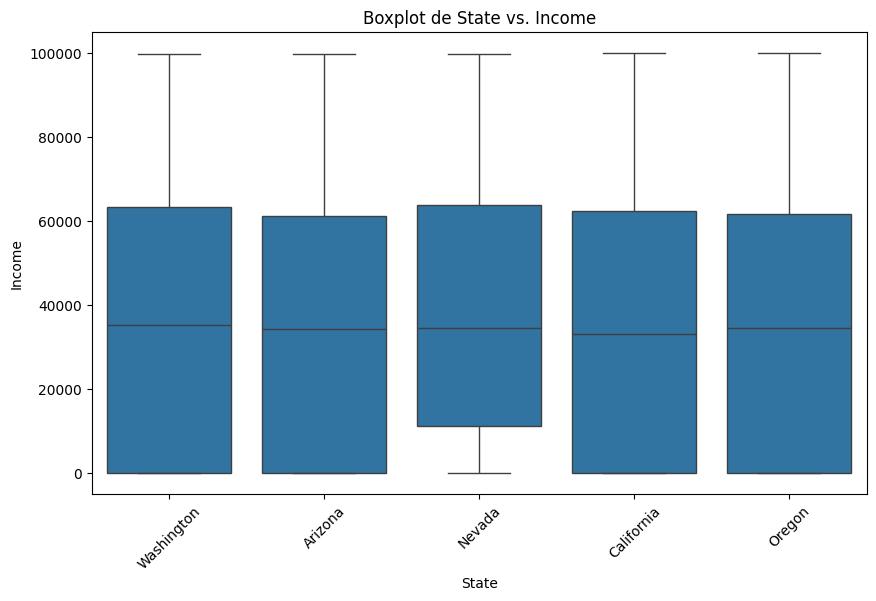

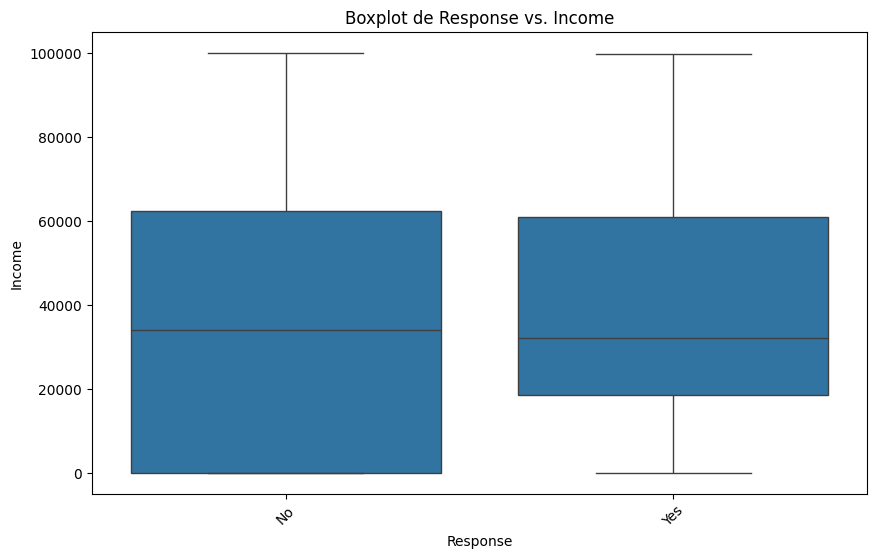

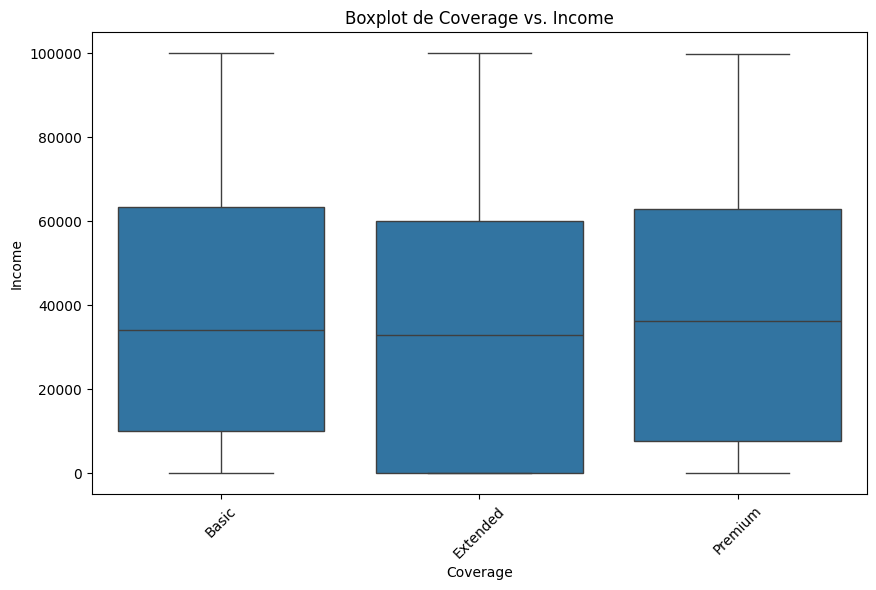

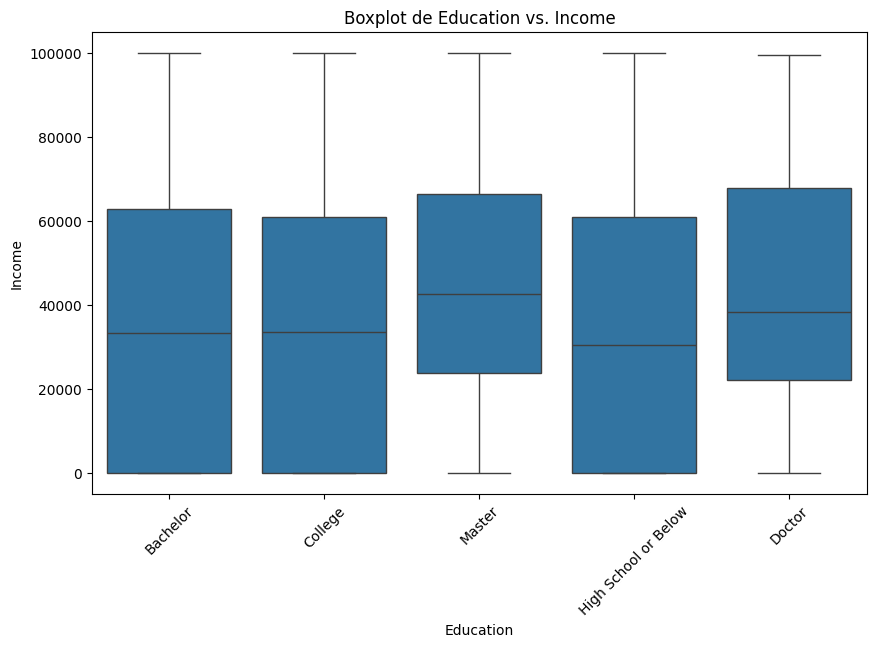

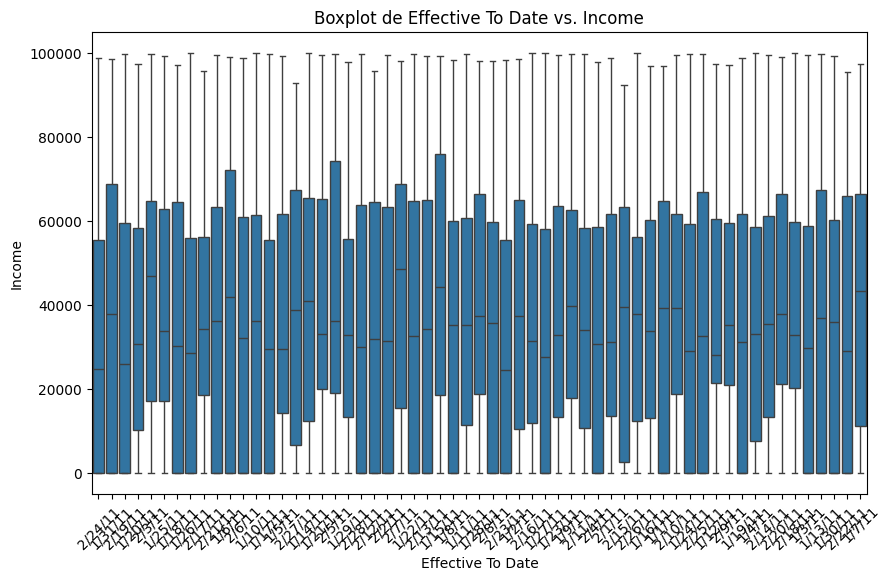

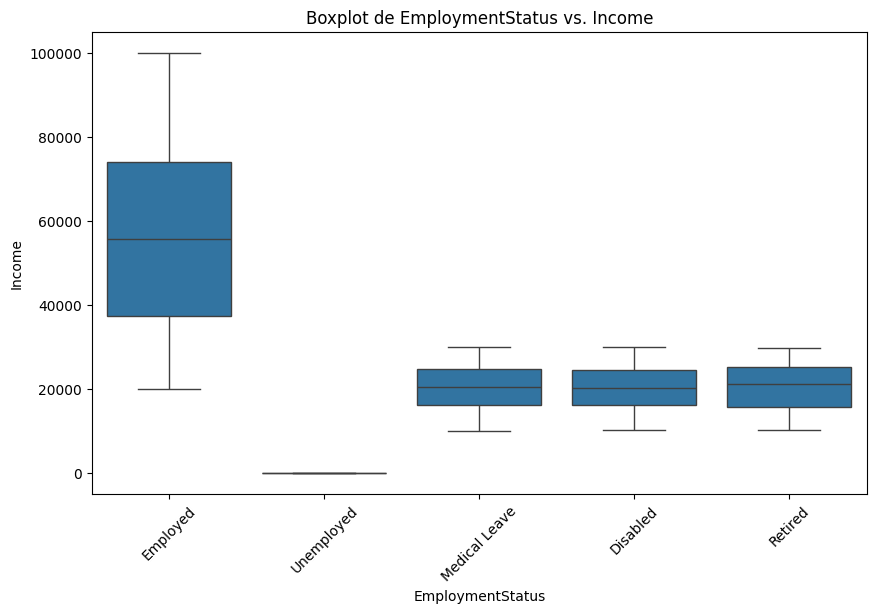

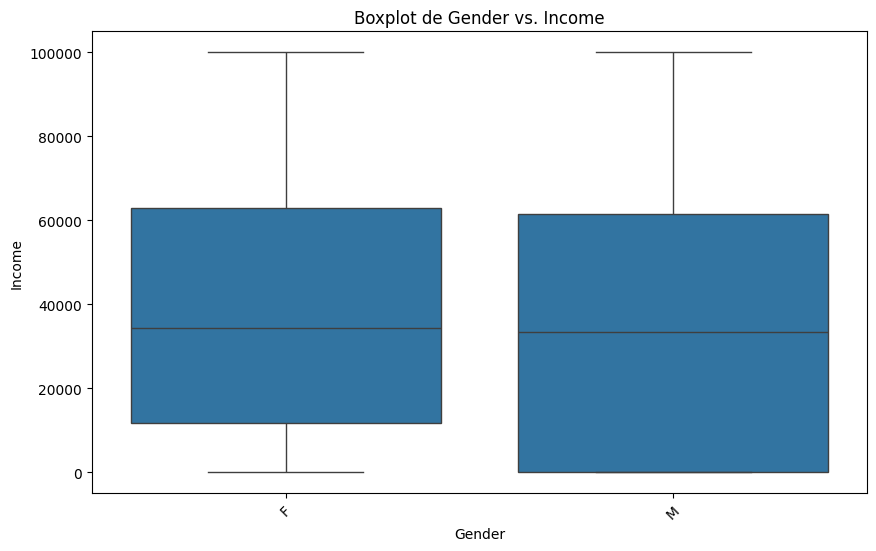

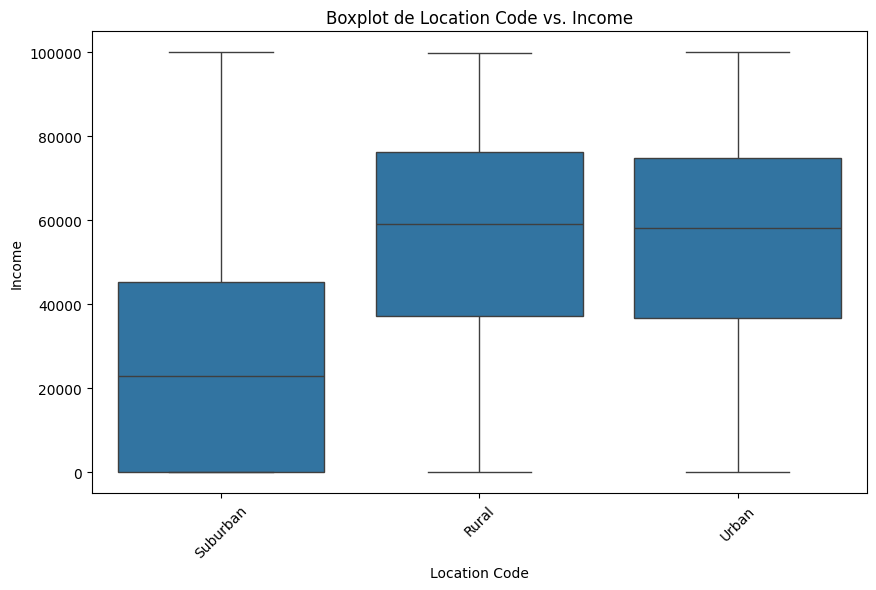

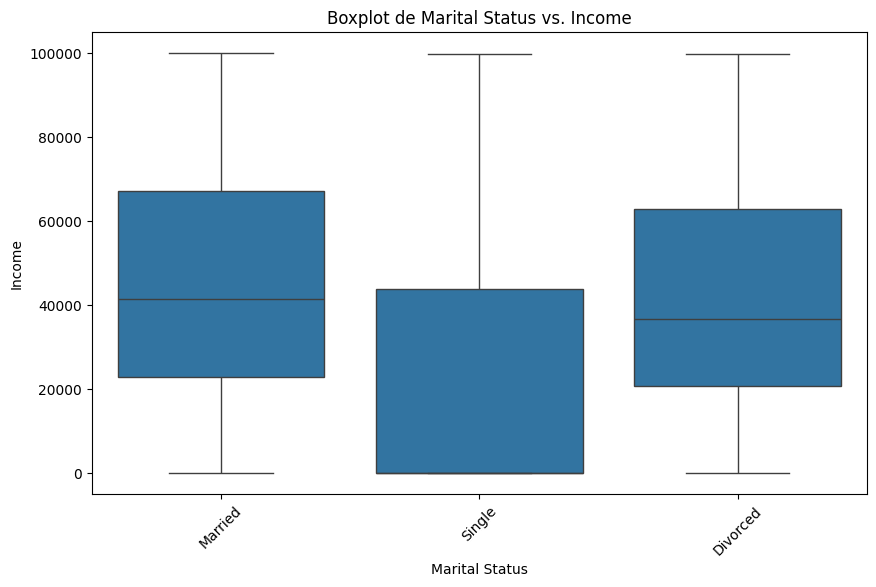

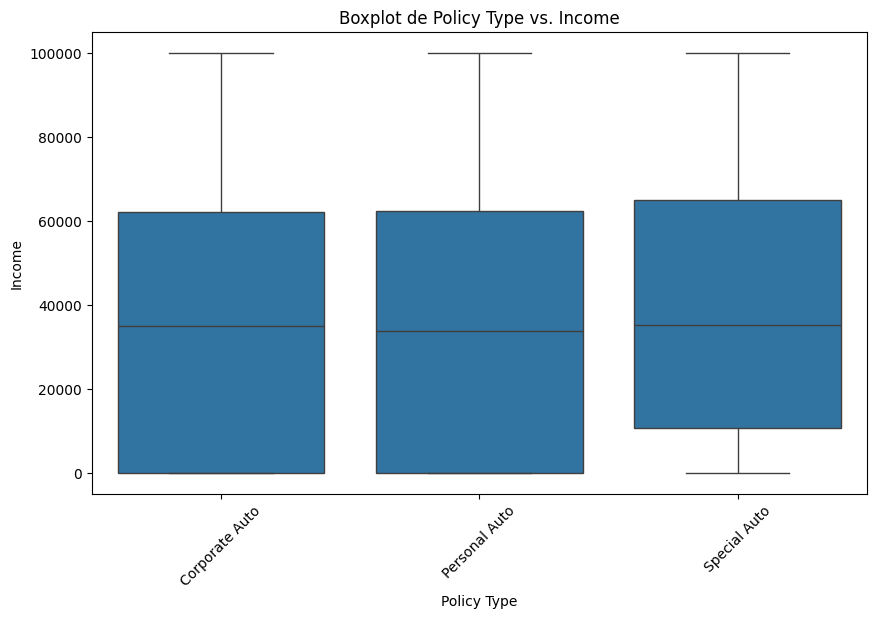

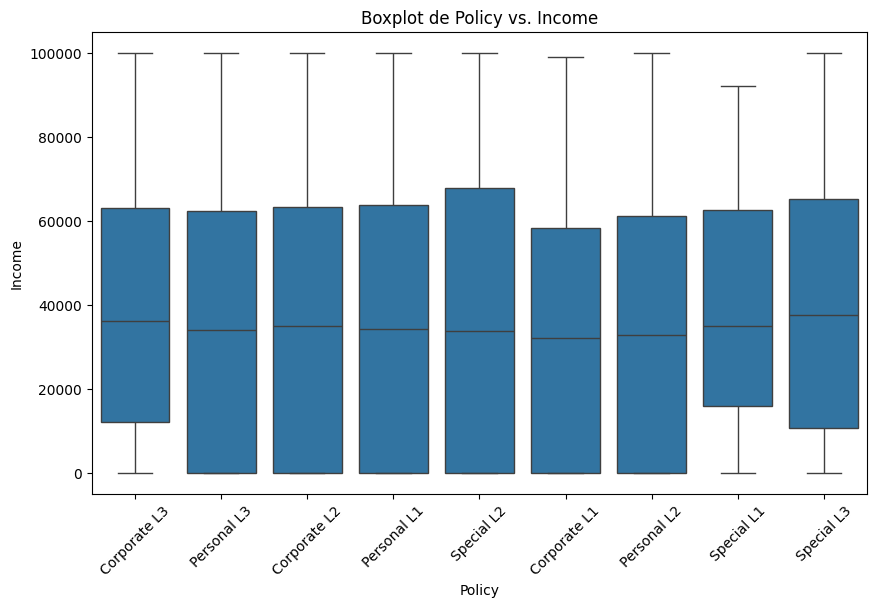

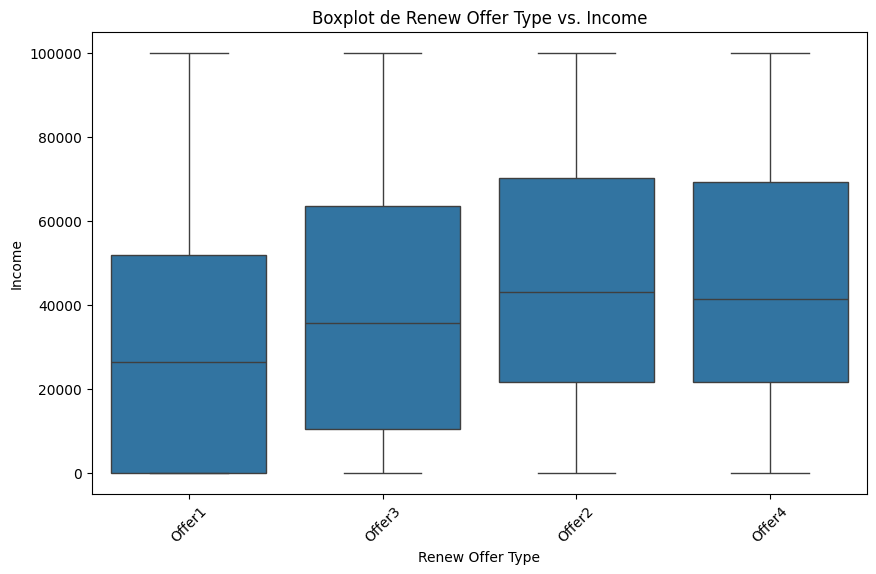

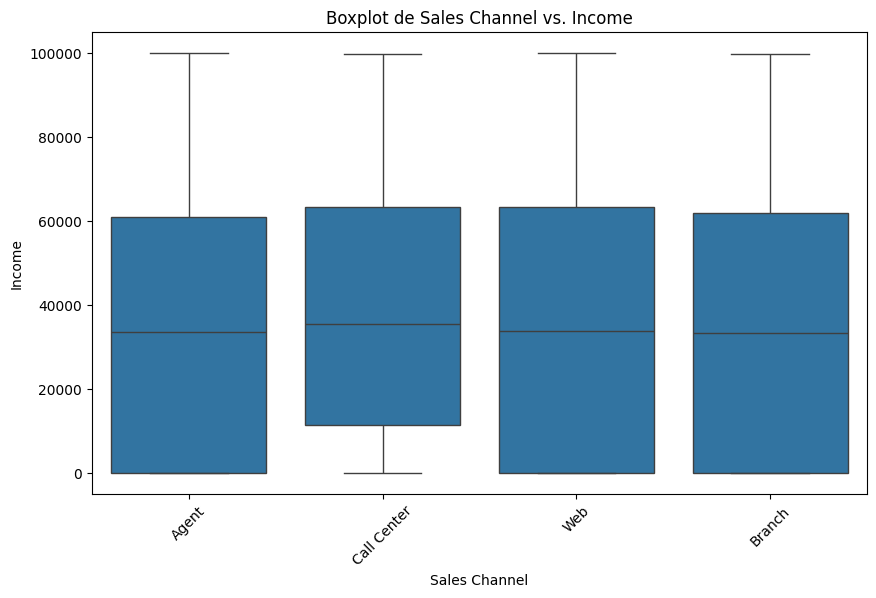

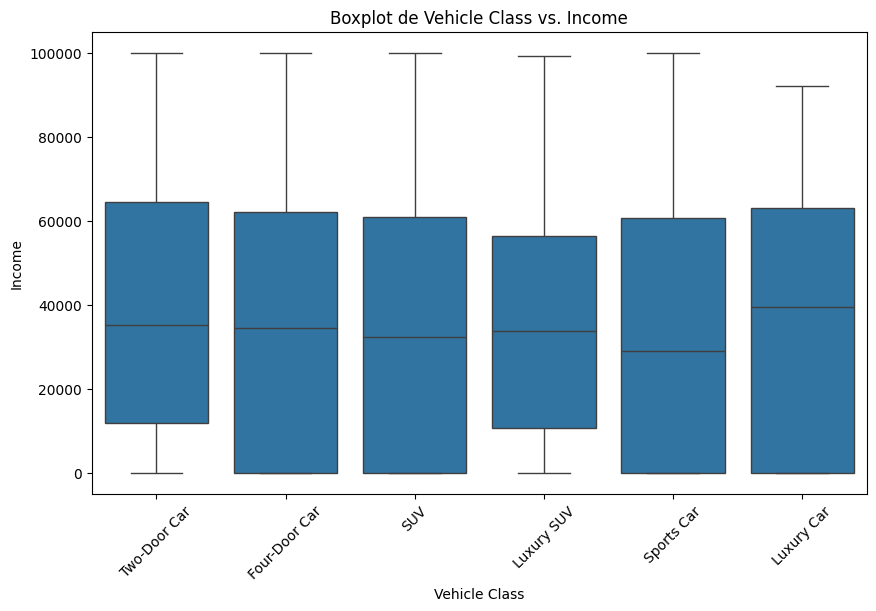

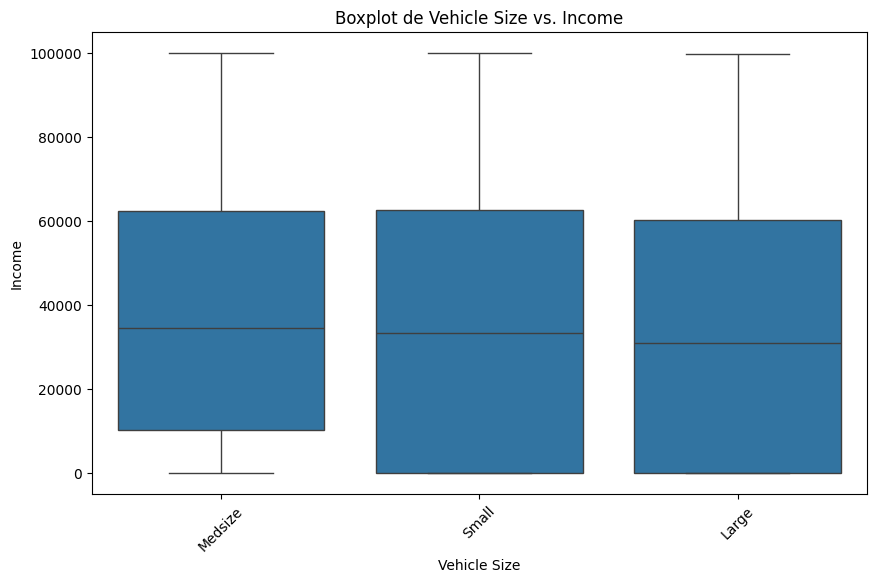

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in categorical_df:
    # Crear un boxplot para cada categoría única en la columna categórica
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=columna, y='Income', data=customer_df)
    plt.title(f'Boxplot de {columna} vs. Income')
    plt.xlabel(columna)
    plt.ylabel('Income')
    plt.xticks(rotation=45)
    plt.show()

OTRO TIPO DE GRAFICA.

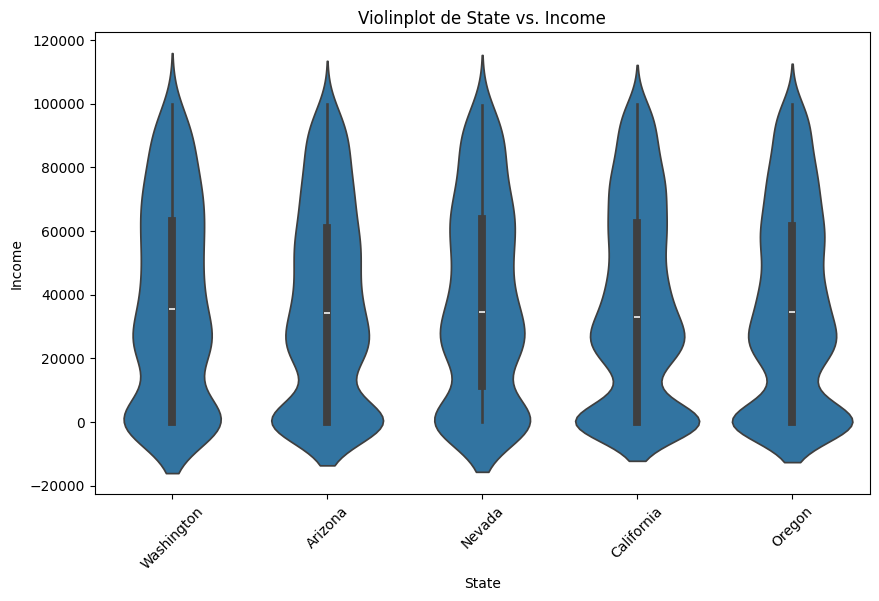

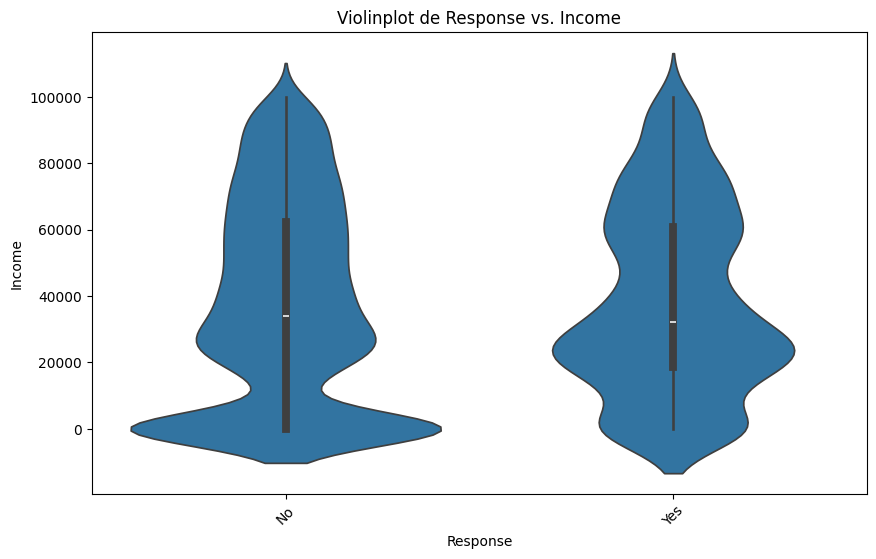

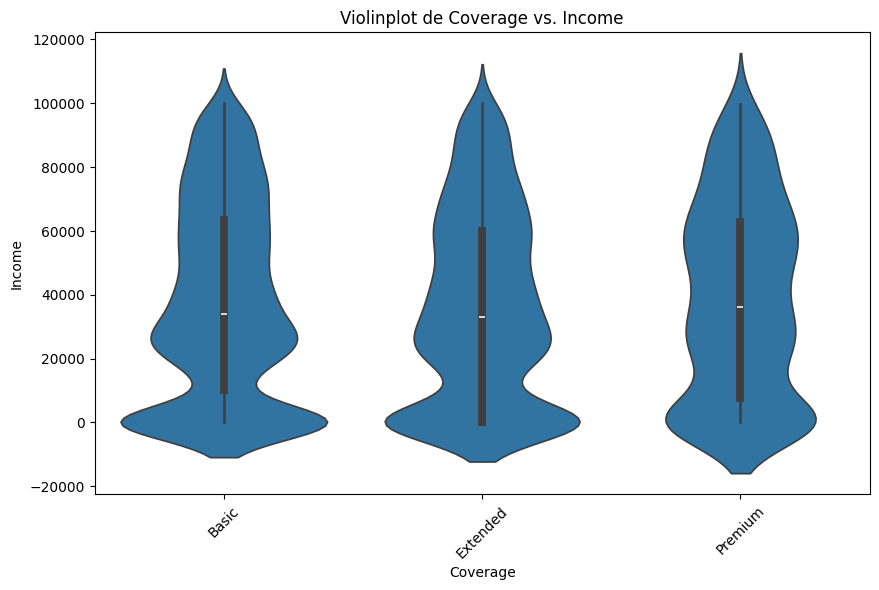

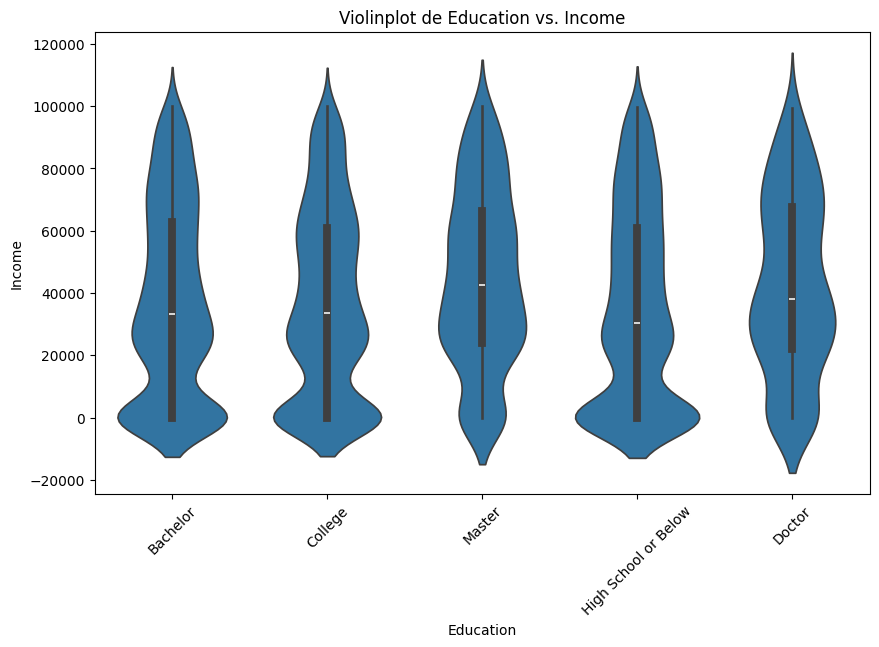

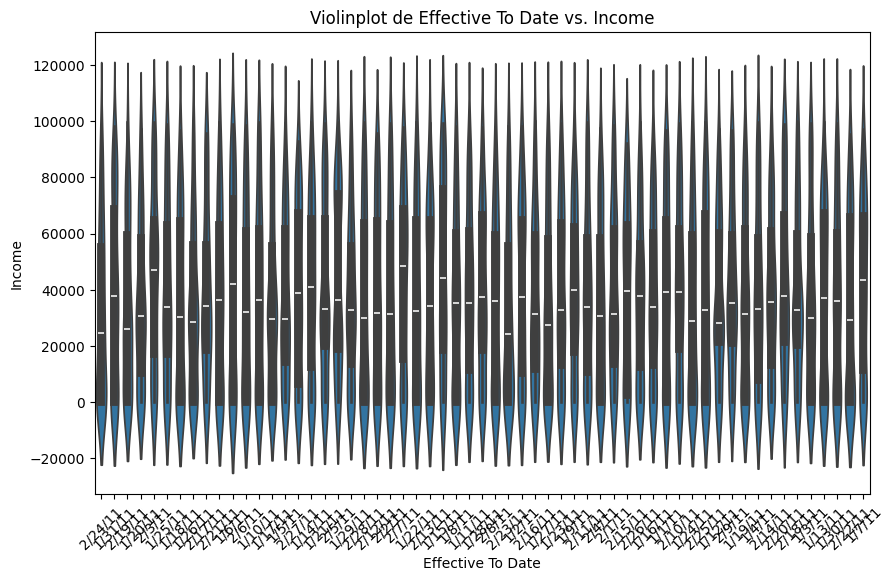

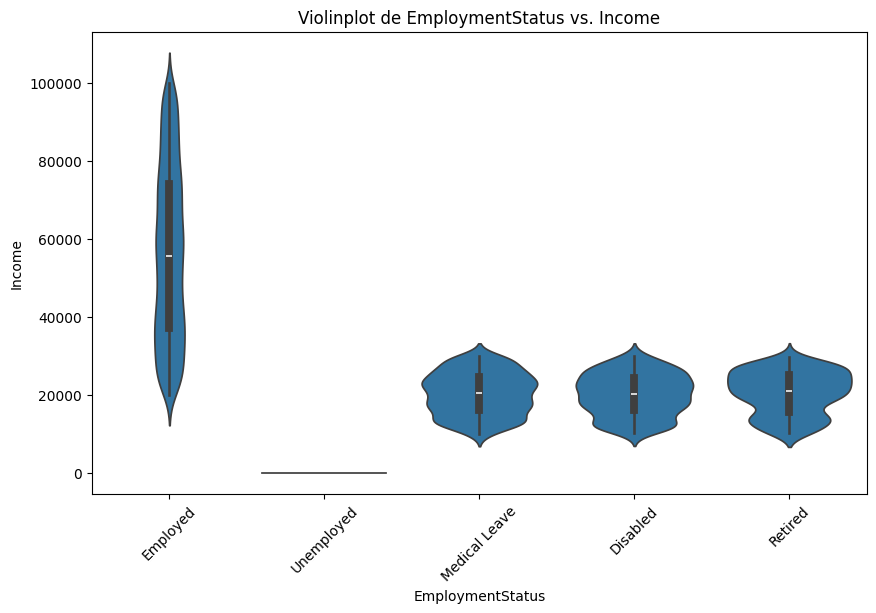

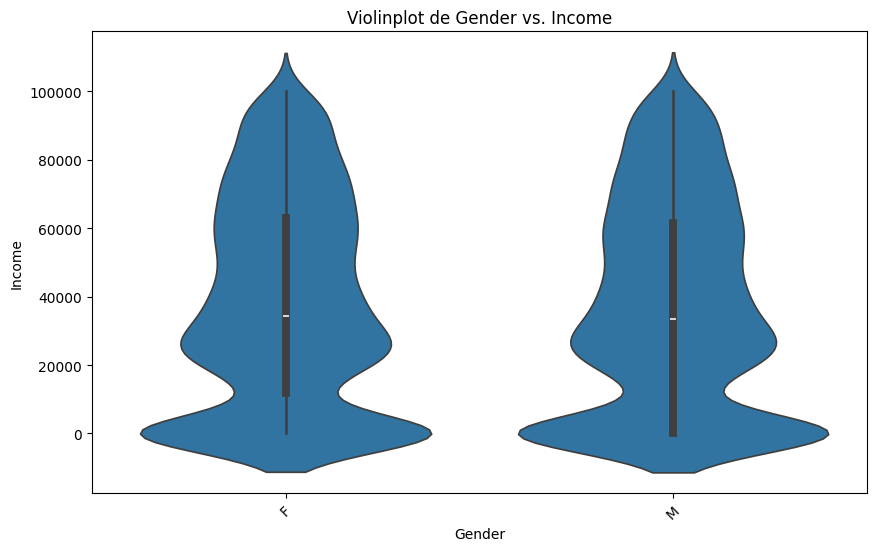

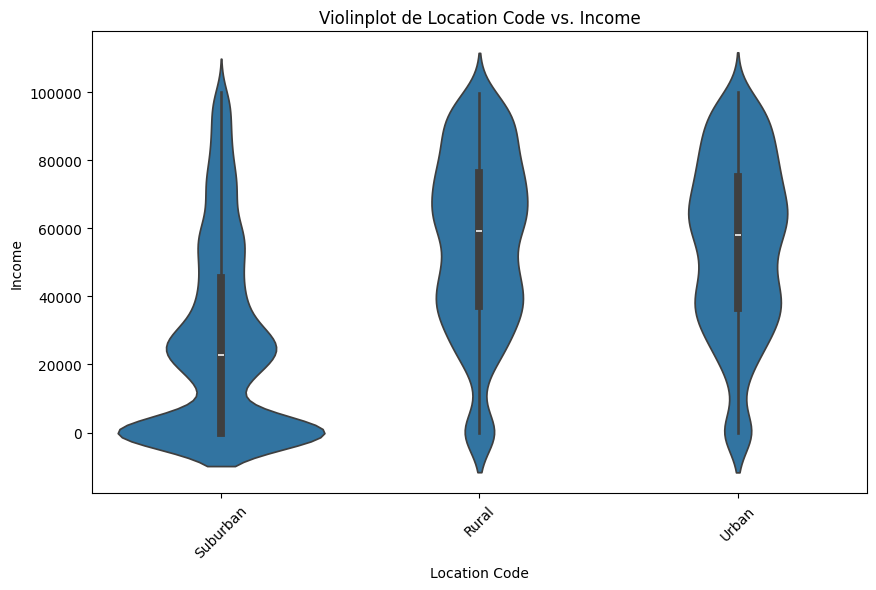

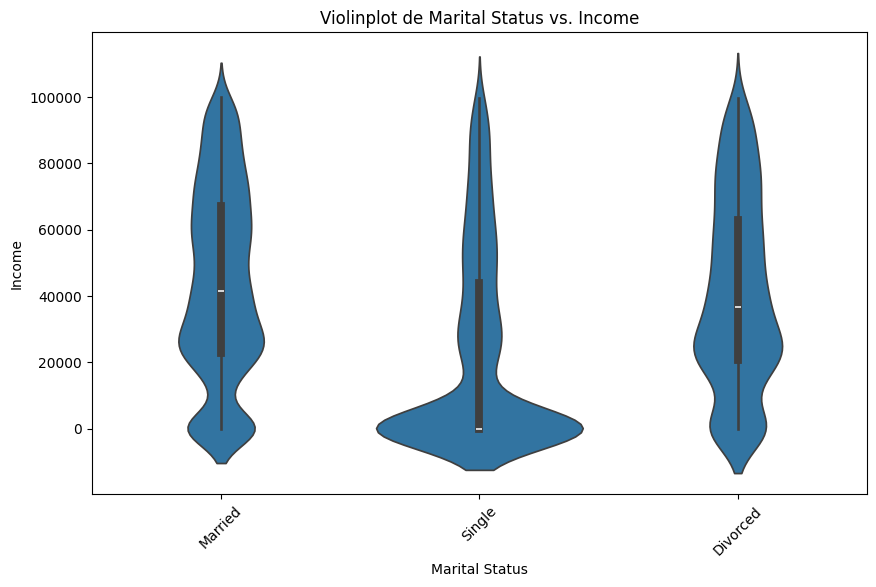

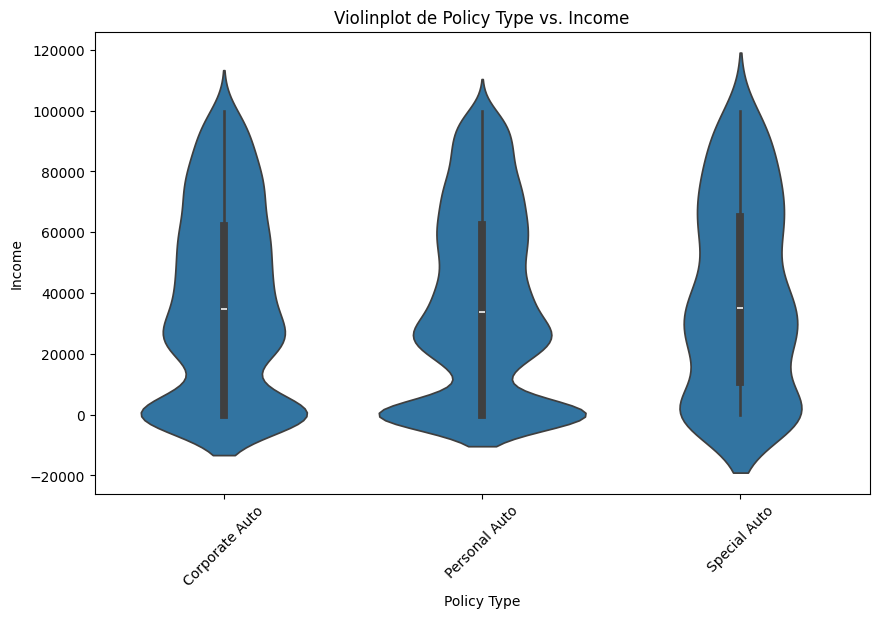

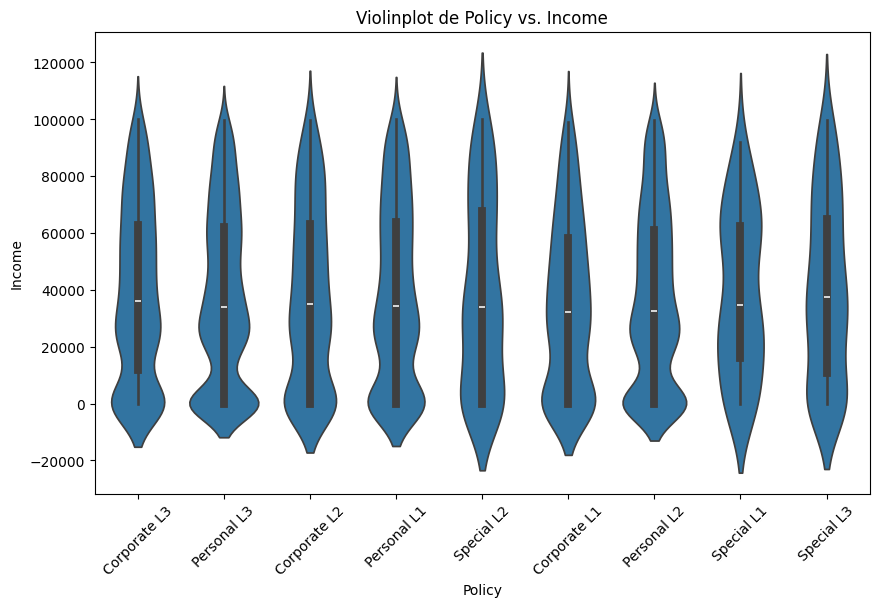

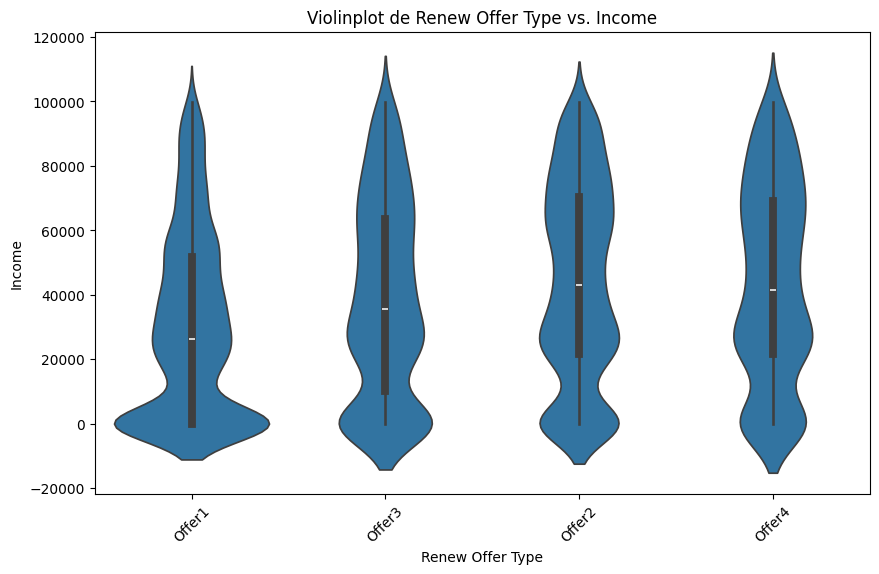

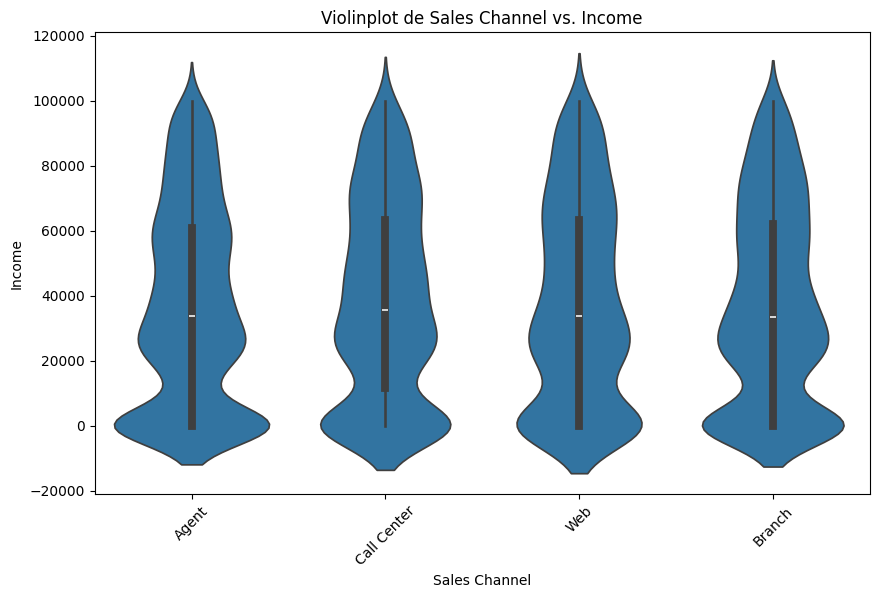

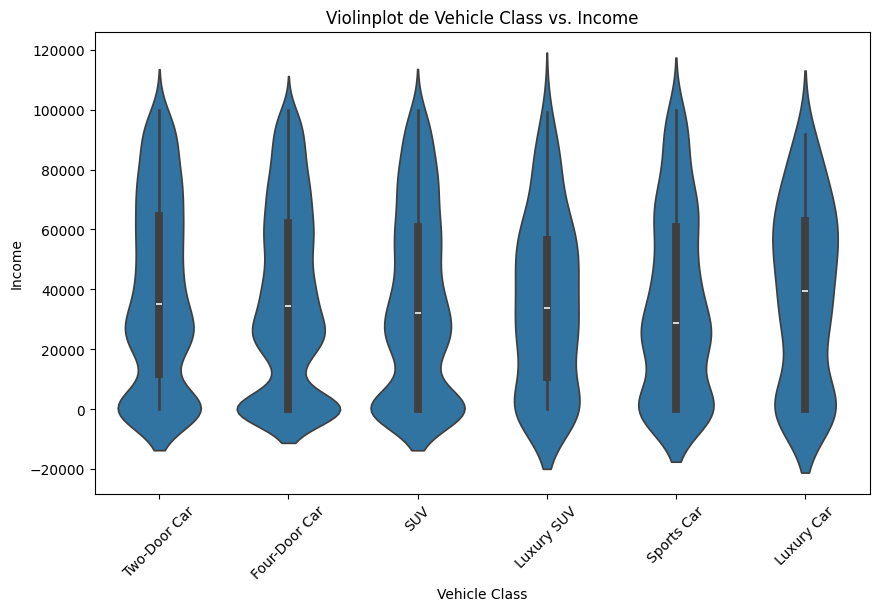

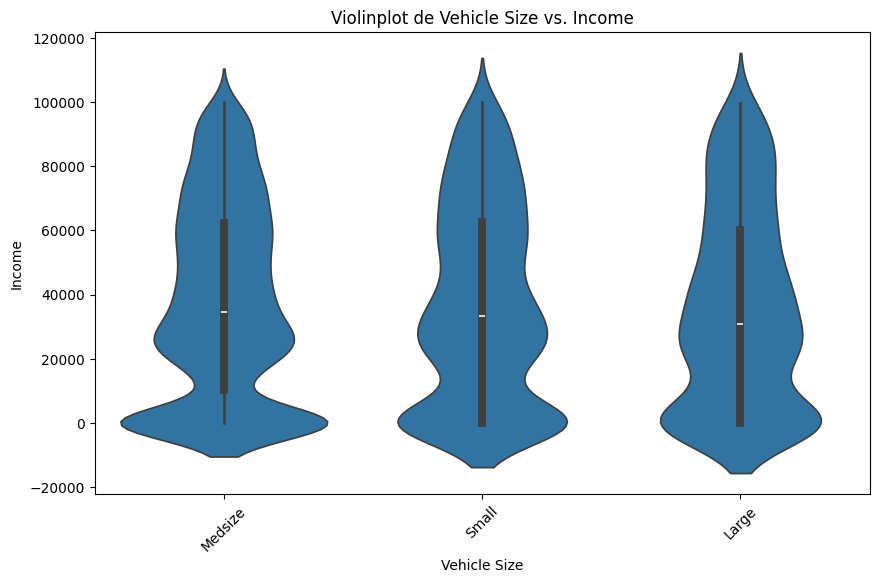

In [8]:

# Iterar sobre las columnas categóricas
for columna in categorical_df:
    # Crear un violinplot para cada categoría única en la columna categórica
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=columna, y='Income', data=customer_df)
    plt.title(f'Violinplot de {columna} vs. Income')
    plt.xlabel(columna)
    plt.ylabel('Income')
    plt.xticks(rotation=45)
    plt.show()


6. Para los datos categóricos, verifique si es necesario realizar alguna limpieza de datos. 
Sugerencia : puede utilizar la función value_counts()en cada una de las columnas categóricas y 
verificar la representación de diferentes categorías en cada columna.
Analice si esta información podría usarse de alguna manera para la limpieza de datos.

In [9]:
# Iterar sobre las columnas categóricas
for columna in categorical_df:
    # Calcular la distribución de valores en la columna categórica
    distribucion = customer_df[columna].value_counts()
    
    # Imprimir la distribución de valores
    print(f"Distribución de valores para la columna '{columna}':")
    print(distribucion)
    print()
    
   

Distribución de valores para la columna 'State':
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

Distribución de valores para la columna 'Response':
Response
No     7826
Yes    1308
Name: count, dtype: int64

Distribución de valores para la columna 'Coverage':
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

Distribución de valores para la columna 'Education':
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

Distribución de valores para la columna 'Effective To Date':
Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/2


La función value_counts()en pandas es una herramienta útil para explorar la distribución de valores en columnas categóricas. Al observar los resultados de value_counts()cada columna categórica, puede identificar posibles problemas en los datos categóricos que podrían requerir limpieza. Aquí hay algunas consideraciones al usar value_counts()para la limpieza de datos:

Valores inexistentes o poco representados : Si una categoría tiene muy poca representación en comparación con otras, podrías considerar agrupar esos valores en una categoría más general o eliminarlos si no son relevantes para tu análisis.

Categorías redundantes o mal etiquetadas : A veces, podrías encontrar diferentes etiquetas para la misma categoría o categorías mal etiquetadas que necesitan ser corregidas para mejorar la consistencia de los datos.

Categorías inesperadas o incorrectas : Puede haber categorías inesperadas o incorrectas que necesiten ser investigadas y corregidas si es necesario. Esto podría incluir errores tipográficos, valores atípicos o categorías que no tienen sentido en el contexto de tus datos.

Desbalance de clases : Si estás trabajando con un problema de clasificación y encuentras un desbalance significativo entre las clases de una variable categórica, es posible que necesites aplicar técnicas de remuestreo o ajustar el peso de las clases durante el entrenamiento del modelo para evitar sesgos.

Al analizar los resultados de value_counts()para cada columna categórica, puedes identificar estos problemas potenciales y tomar medidas apropiadas para limpiar los datos y mejorar la calidad de tu conjunto de datos antes de realizar análisis adicionales o entrenar modelos de aprendizaje automático.